In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy.signal import argrelextrema
import warnings
warnings.filterwarnings("ignore")

C:\Users\David\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\David\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
data = pd.read_csv("household_power_consumption.txt",
                  sep=';',
                  index_col=False)

In [3]:
cols = data.columns.drop(['Date', 'Time'])
data[cols] = data[cols].apply(pd.to_numeric,
                              errors='coerce')
data['Date'] = pd.to_datetime(data['Date'],
                             format='%d/%m/%Y')
data['Time'] = pd.to_datetime(data['Time'],
                             format='%H:%M:%S').dt.time


In [4]:
def time_convert(x):
    h = x.hour
    m = x.minute
    s = x.second
    return (h*60+m)*60+s


In [5]:
data['Seconds'] = data['Time'].apply(time_convert)

In [6]:
data = data.fillna(0)

In [7]:
data['Weekday'] = data['Date'].dt.dayofweek

In [8]:
data

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Seconds,Weekday
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,62640,5
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,62700,5
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,62760,5
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,62820,5
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,62880,5
...,...,...,...,...,...,...,...,...,...,...,...
2075254,2010-11-26,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,75480,4
2075255,2010-11-26,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,75540,4
2075256,2010-11-26,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,75600,4
2075257,2010-11-26,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0,75660,4


In [9]:
friday_data = data.loc[data['Weekday'] == 4]

In [10]:
friday_data

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Seconds,Weekday
7596,2006-12-22,00:00:00,0.206,0.000,245.70,0.8,0.0,0.0,0.0,0,4
7597,2006-12-22,00:01:00,0.206,0.000,246.18,0.8,0.0,0.0,0.0,60,4
7598,2006-12-22,00:02:00,0.328,0.130,245.61,1.4,0.0,0.0,0.0,120,4
7599,2006-12-22,00:03:00,0.314,0.128,244.63,1.4,0.0,0.0,0.0,180,4
7600,2006-12-22,00:04:00,0.310,0.128,244.51,1.4,0.0,0.0,0.0,240,4
...,...,...,...,...,...,...,...,...,...,...,...
2075254,2010-11-26,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,75480,4
2075255,2010-11-26,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,75540,4
2075256,2010-11-26,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,75600,4
2075257,2010-11-26,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0,75660,4


In [11]:
sns.set_theme(style='darkgrid')

In [12]:
sns.set(rc={'figure.figsize':(24,10)})

In [13]:
friday_dec_22 = friday_data.loc[friday_data['Date']=='2006-12-22']

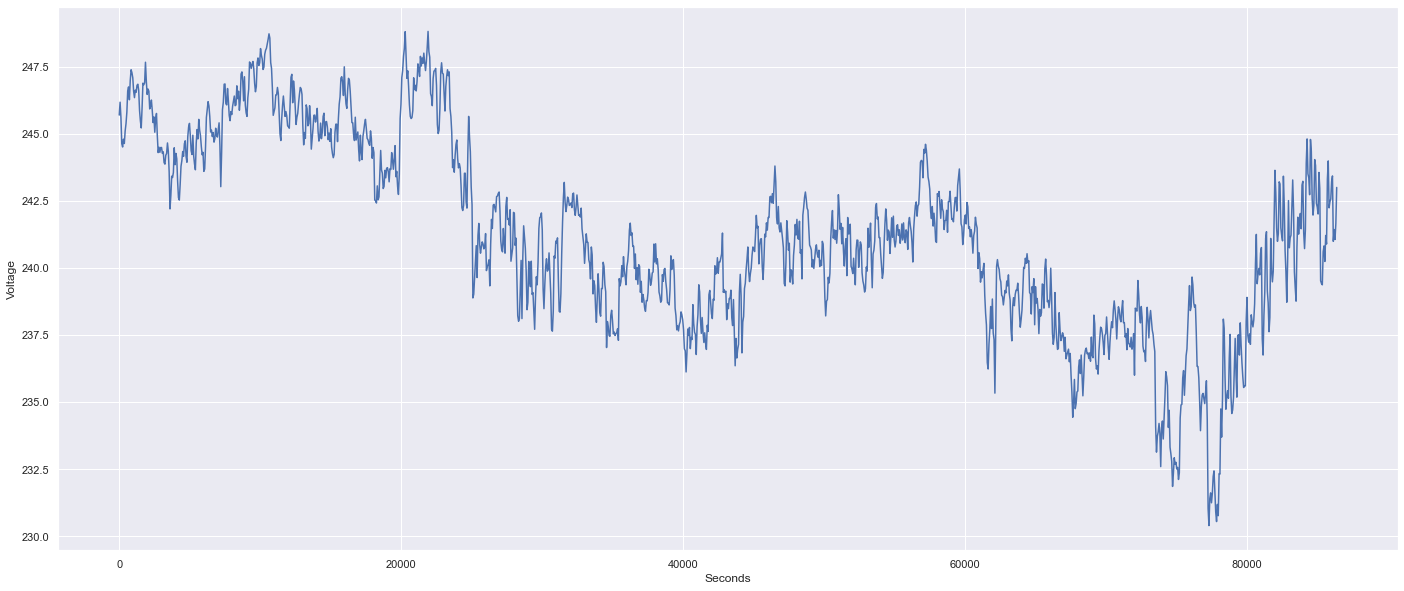

In [16]:
sns.lineplot(data=friday_dec_22,
            x='Seconds',
            y='Voltage');

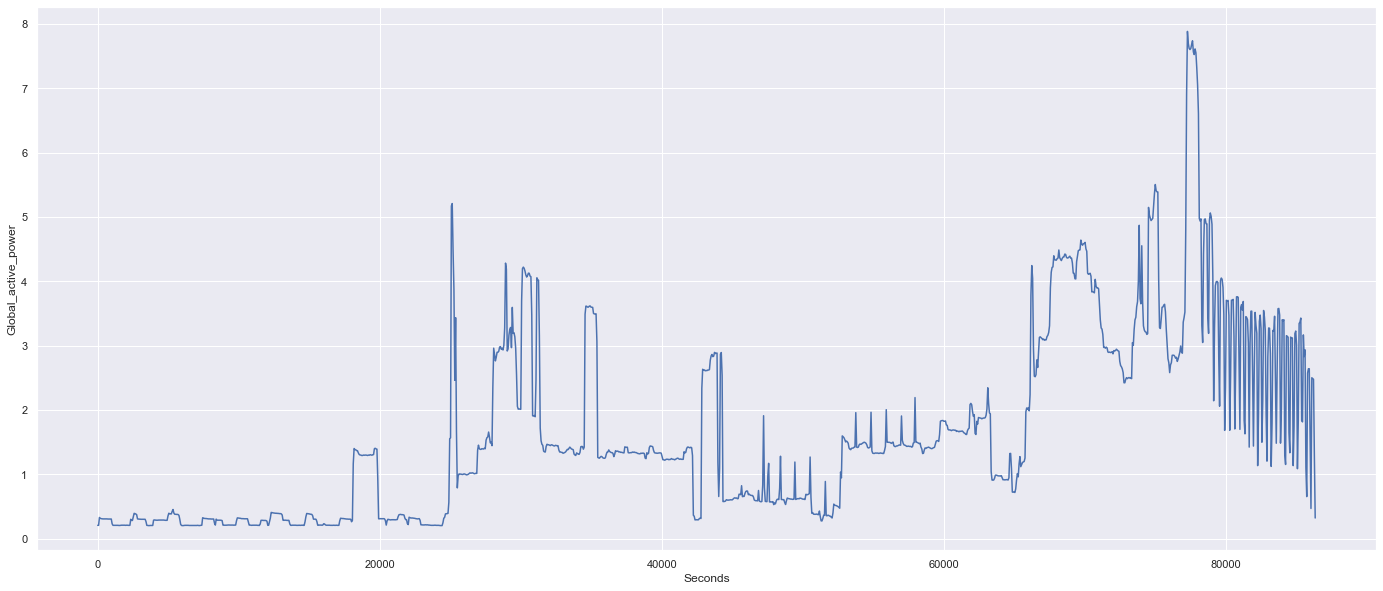

In [17]:
sns.lineplot(data=friday_dec_22,
            x='Seconds',
            y='Global_active_power');

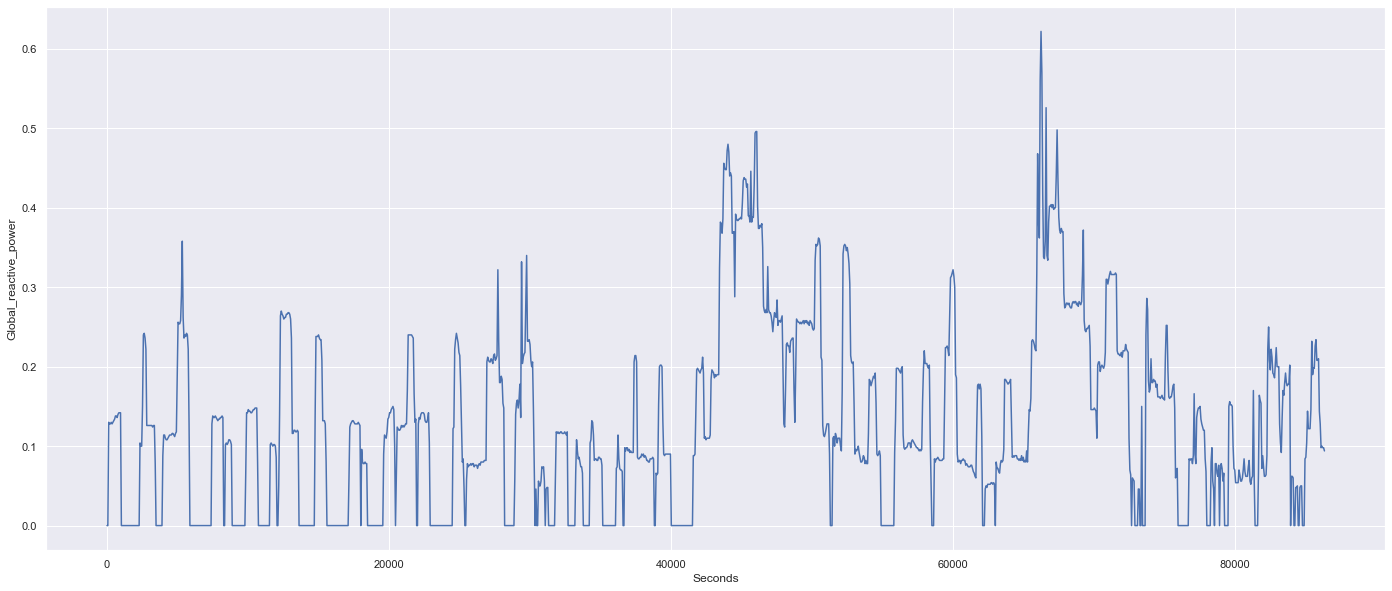

In [18]:
sns.lineplot(data=friday_dec_22,
            x='Seconds',
            y='Global_reactive_power');

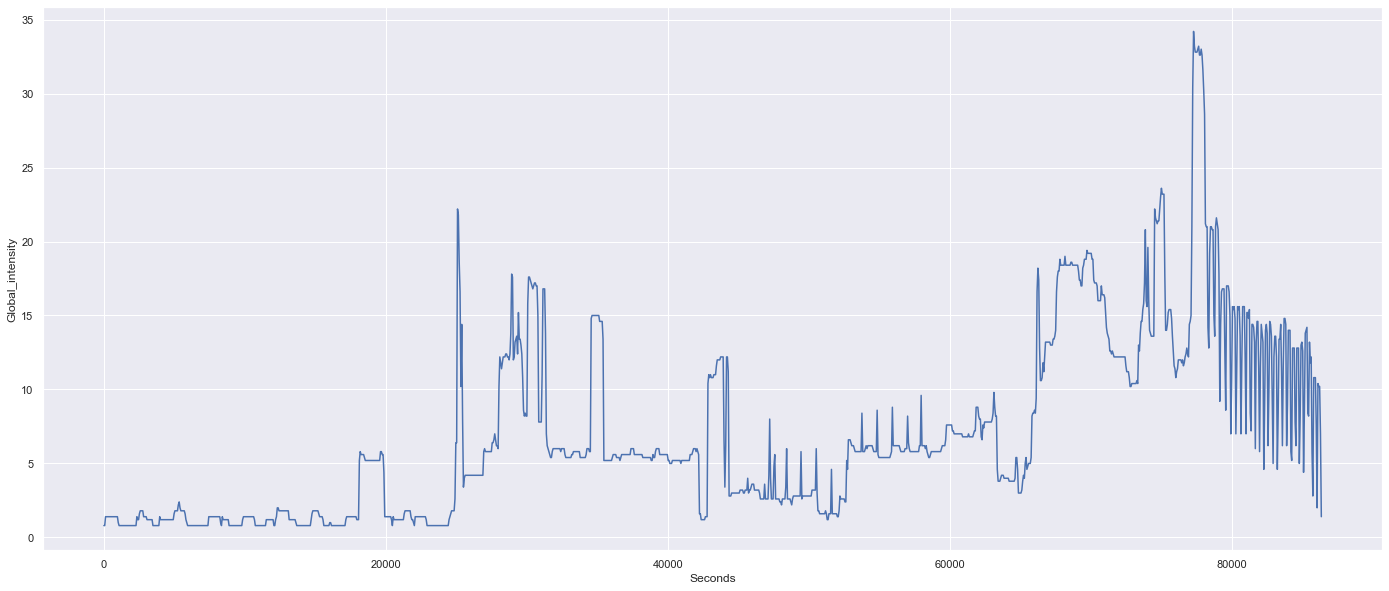

In [19]:
sns.lineplot(data=friday_dec_22,
            x='Seconds',
            y='Global_intensity');

<Figure size 1440x720 with 0 Axes>

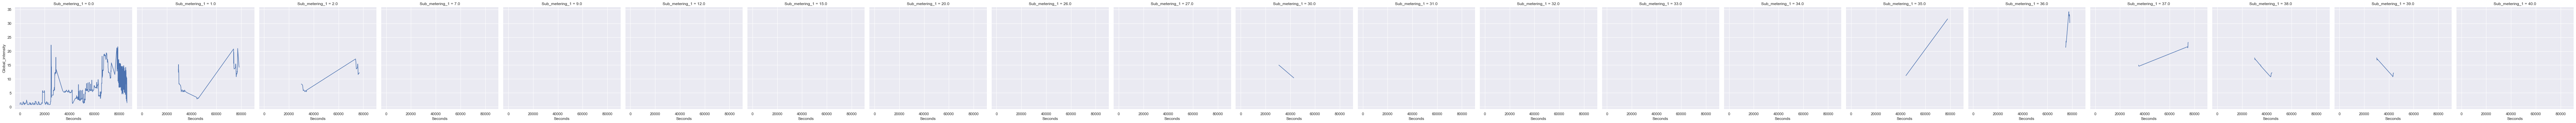

In [22]:
plt.figure(figsize=(20,10))
sns.relplot(data=friday_dec_22,
           x='Seconds',
           y='Global_intensity',
           col='Sub_metering_1',
           kind='line');

<Figure size 1440x720 with 0 Axes>

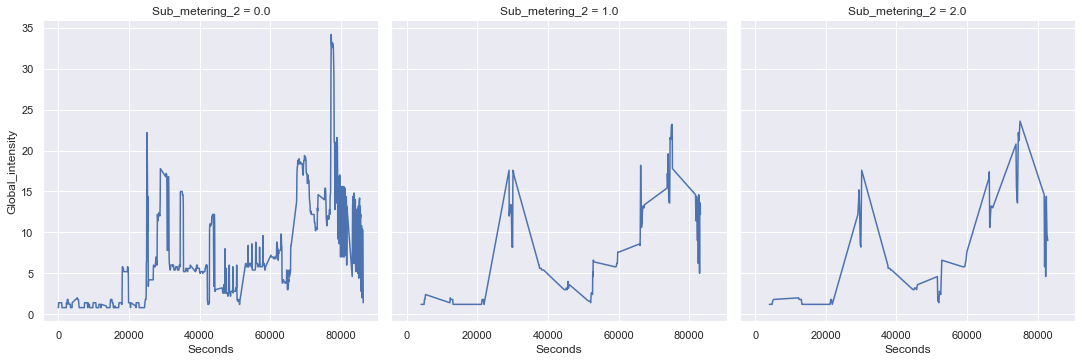

In [21]:
plt.figure(figsize=(20,10))
sns.relplot(data=friday_dec_22,
           x='Seconds',
           y='Global_intensity',
           col='Sub_metering_2',
           kind='line');

<Figure size 1440x720 with 0 Axes>

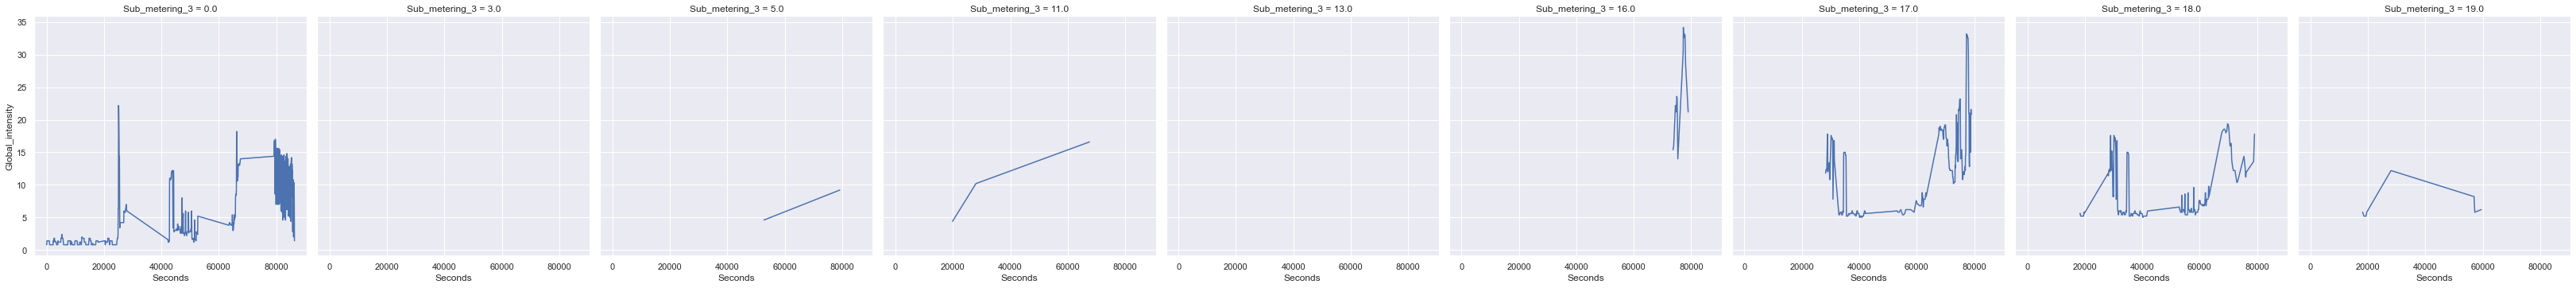

In [23]:
plt.figure(figsize=(20,10))
sns.relplot(data=friday_dec_22,
           x='Seconds',
           y='Global_intensity',
           col='Sub_metering_3',
           kind='line');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


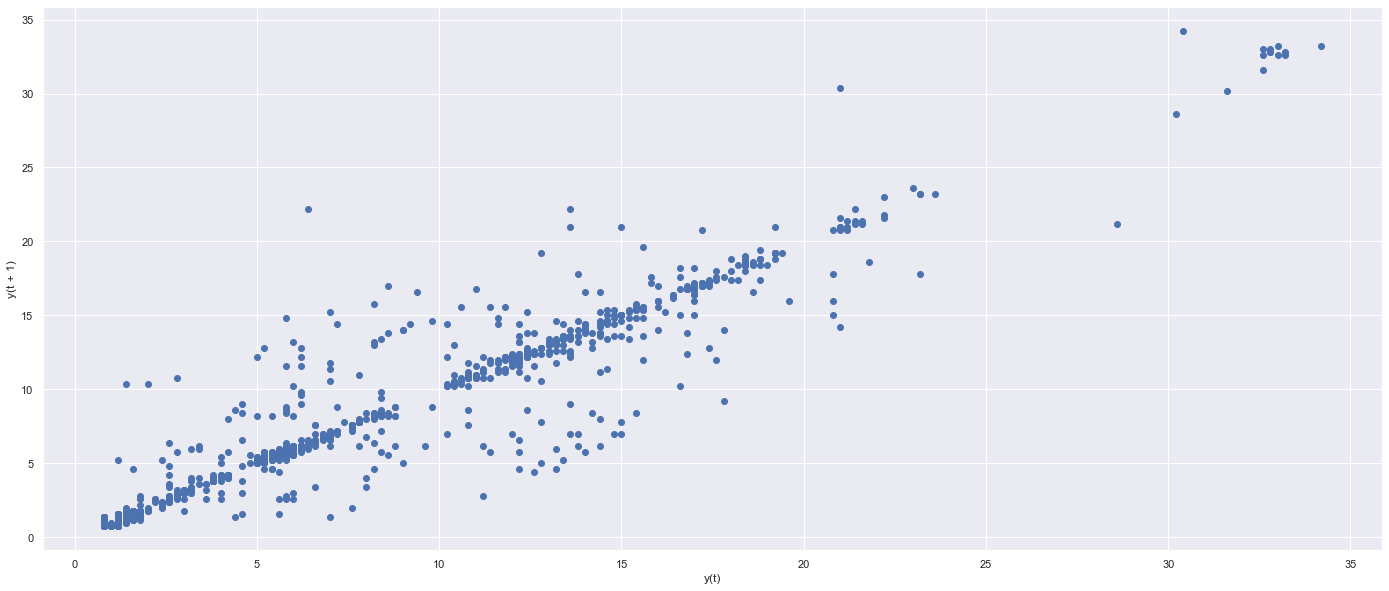

In [24]:
lag_plot(friday_dec_22['Global_intensity']);

<Figure size 1728x720 with 0 Axes>

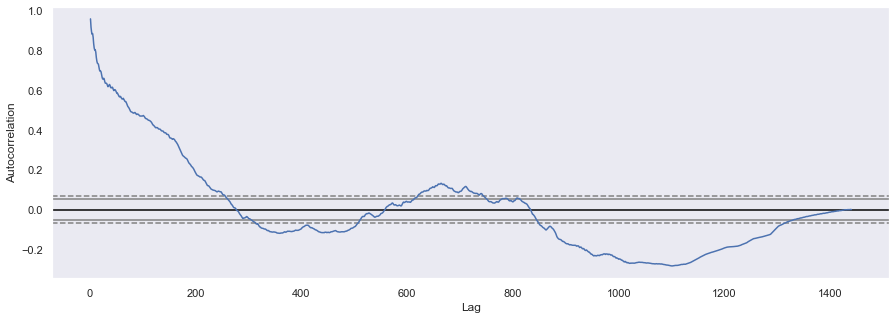

In [25]:
plt.clf()
fig, ax = plt.subplots(figsize=(15, 5))
autocorrelation_plot(friday_dec_22['Global_intensity'], ax=ax);

<Figure size 1728x720 with 0 Axes>

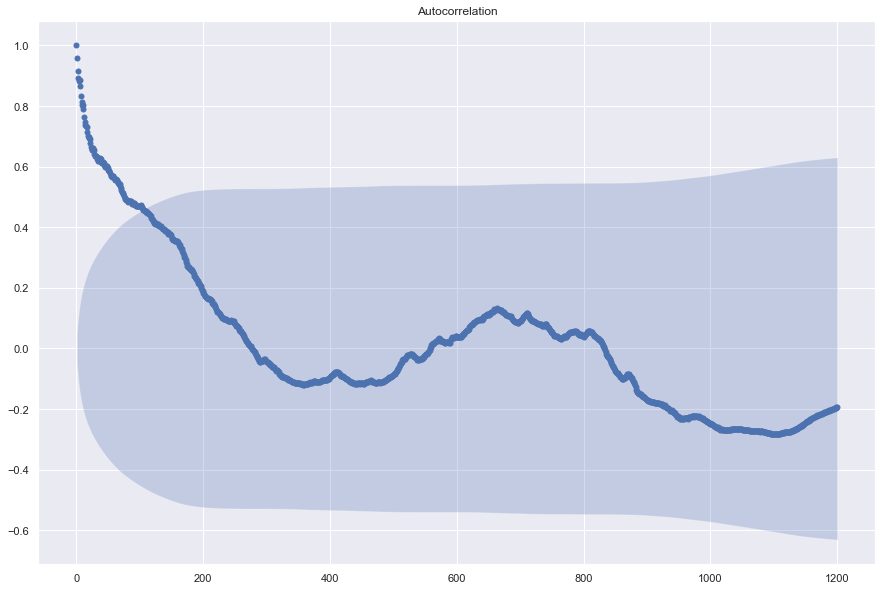

In [26]:
plt.clf()
fig, ax = plt.subplots(figsize=(15, 10))
plot_acf(friday_dec_22['Global_intensity'], lags=1200, use_vlines=False, ax=ax);

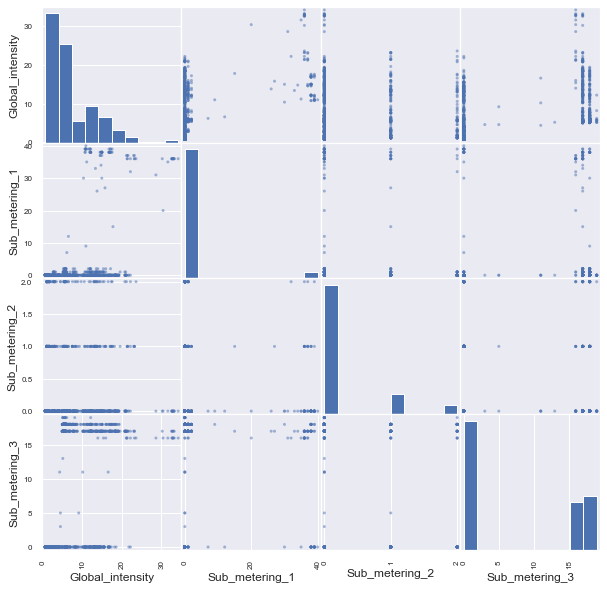

In [29]:
subset = friday_dec_22[['Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']]
scatter_matrix(subset, figsize=(10,10), diagonal='hist');

In [27]:
friday_dec_22_16to22 = friday_dec_22.loc[(friday_dec_22['Seconds'] >= 57600) & (friday_dec_22['Seconds'] <= 79200)]

In [30]:
friday_dec_22_16to22

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Seconds,Weekday
8556,2006-12-22,16:00:00,1.432,0.094,241.84,5.8,0.0,0.0,18.0,57600,4
8557,2006-12-22,16:01:00,1.434,0.096,242.29,5.8,0.0,0.0,18.0,57660,4
8558,2006-12-22,16:02:00,1.422,0.094,241.56,5.8,0.0,0.0,18.0,57720,4
8559,2006-12-22,16:03:00,1.428,0.096,242.04,5.8,0.0,0.0,18.0,57780,4
8560,2006-12-22,16:04:00,1.486,0.156,241.64,6.2,0.0,0.0,18.0,57840,4
...,...,...,...,...,...,...,...,...,...,...,...
8912,2006-12-22,21:56:00,5.010,0.070,234.70,21.2,0.0,0.0,16.0,78960,4
8913,2006-12-22,21:57:00,4.886,0.078,235.14,20.8,0.0,0.0,17.0,79020,4
8914,2006-12-22,21:58:00,4.082,0.072,236.22,17.8,0.0,0.0,18.0,79080,4
8915,2006-12-22,21:59:00,2.142,0.056,237.37,9.2,0.0,0.0,5.0,79140,4


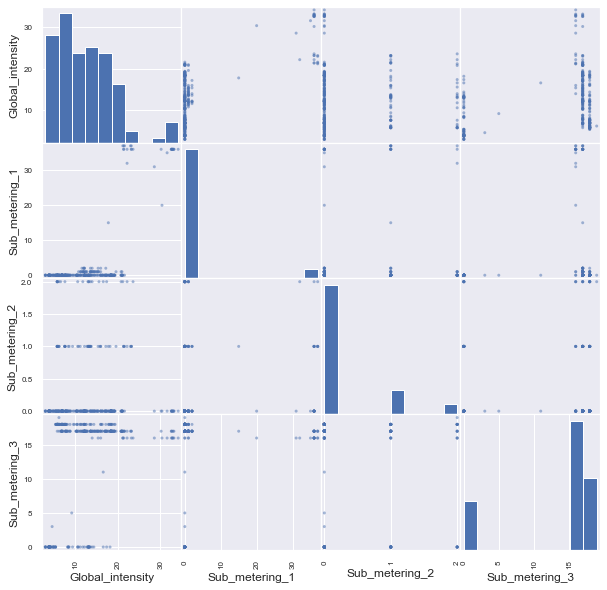

In [31]:
subset = friday_dec_22_16to22[['Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']]
scatter_matrix(subset, figsize=(10,10), diagonal='hist');

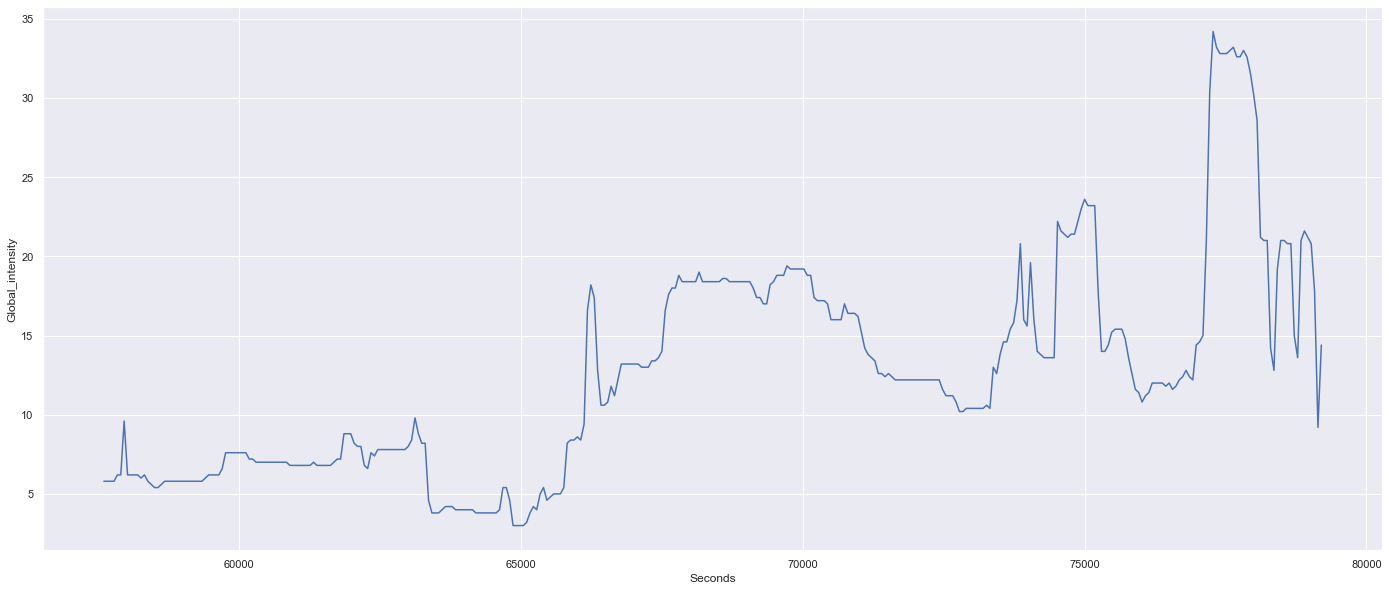

In [32]:
sns.lineplot(data=friday_dec_22_16to22,
            x='Seconds',
            y='Global_intensity');

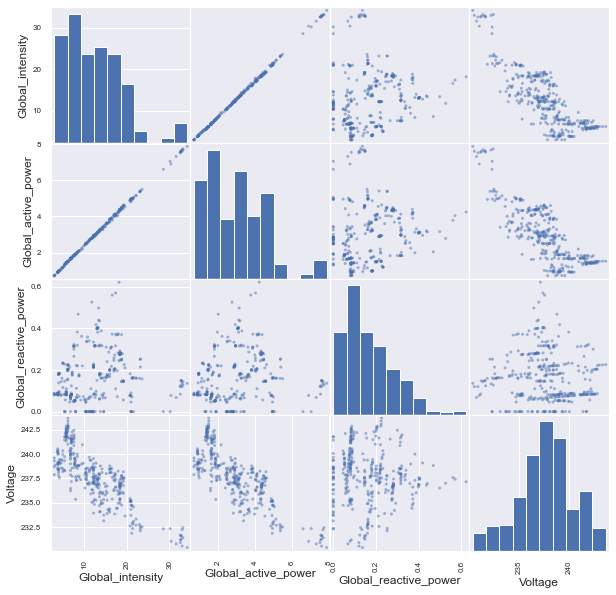

In [33]:
subset = friday_dec_22_16to22[['Global_intensity','Global_active_power','Global_reactive_power','Voltage']]
scatter_matrix(subset, figsize=(10,10), diagonal='hist');

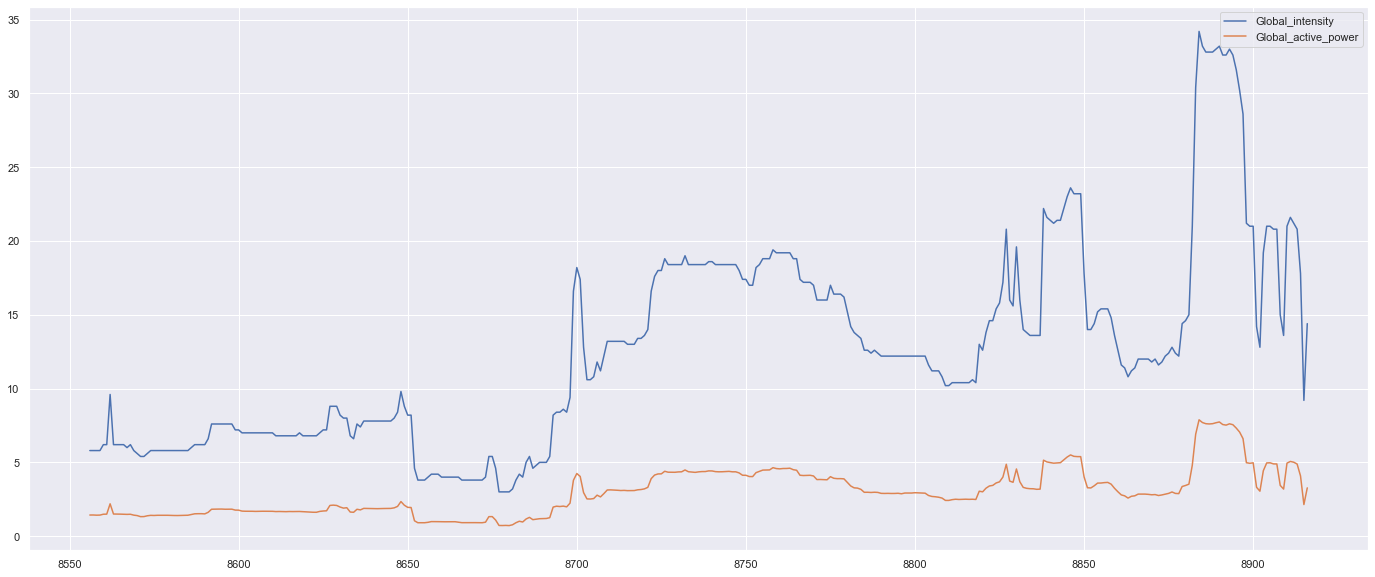

In [34]:
friday_dec_22_16to22[['Global_intensity','Global_active_power']].plot();

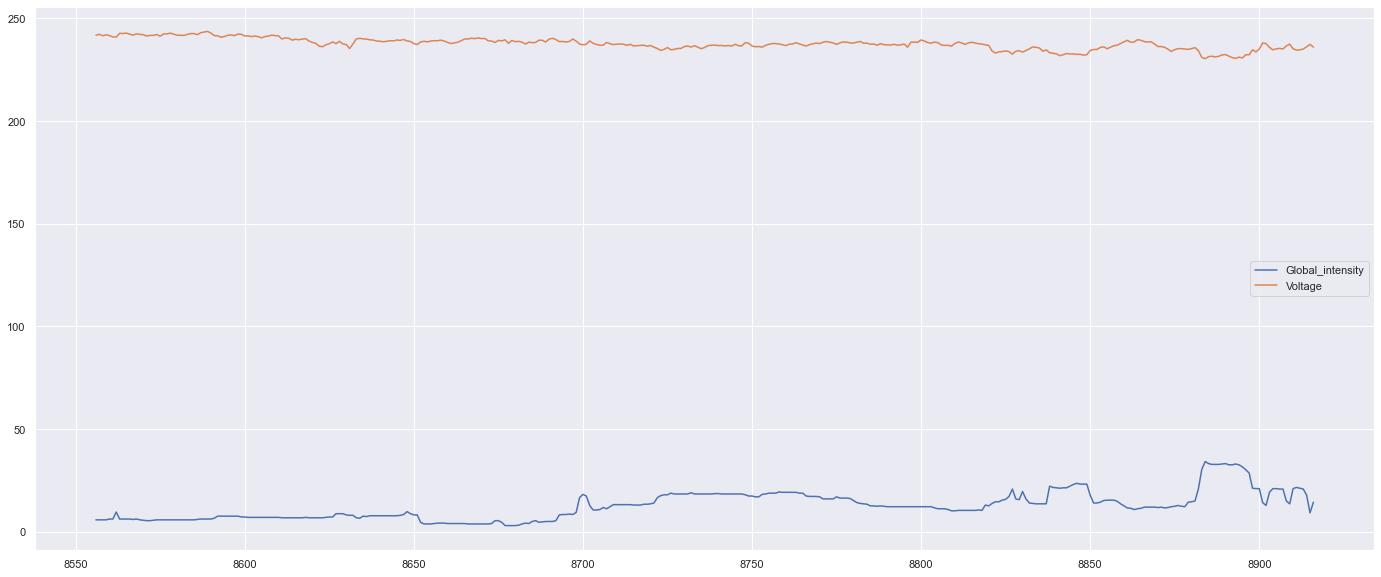

In [35]:
friday_dec_22_16to22[['Global_intensity','Voltage']].plot();

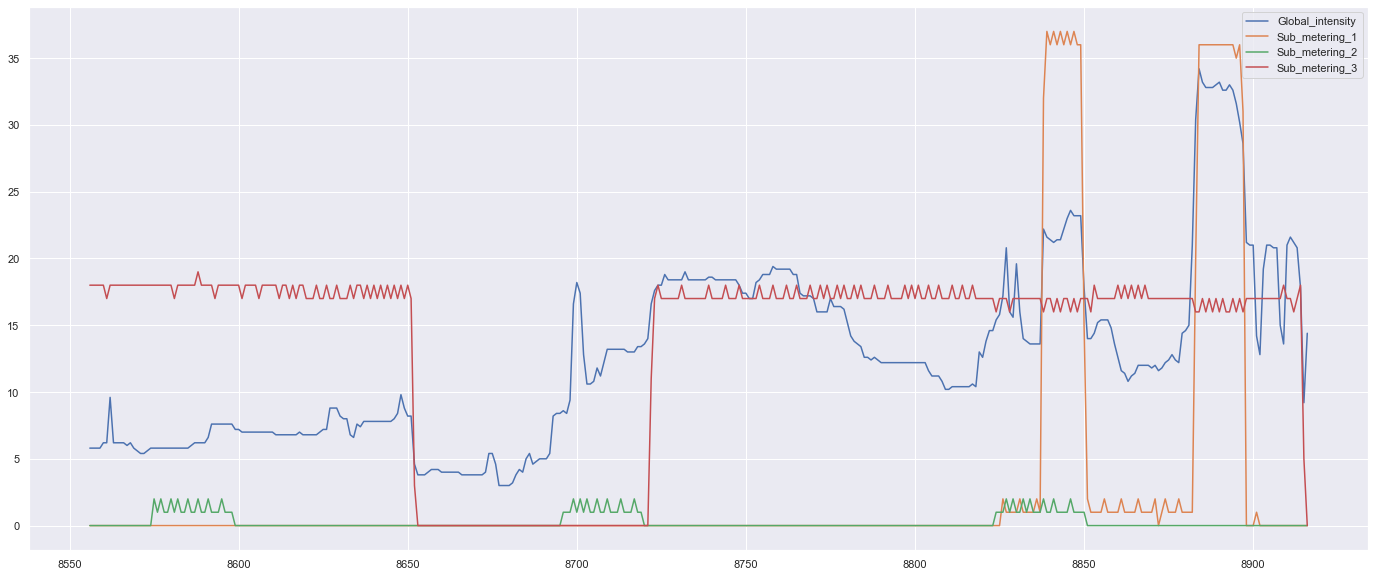

In [36]:
friday_dec_22_16to22[['Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']].plot();

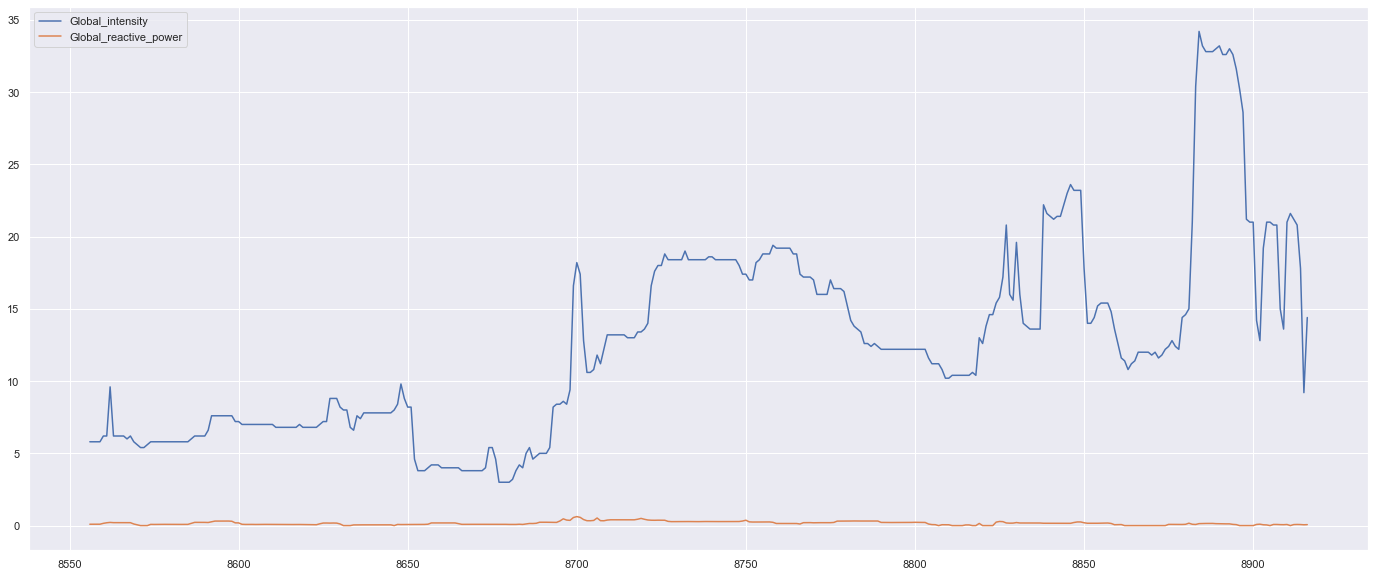

In [37]:
friday_dec_22_16to22[['Global_intensity','Global_reactive_power']].plot();

In [38]:
trend_dict = {}
tdi = pd.DatetimeIndex(friday_dec_22_16to22.Date)
friday_dec_22_16to22.set_index(tdi, inplace=True)
friday_dec_22_16to22.drop(columns='Date', inplace=True)
friday_dec_22_16to22.index.name = 'datetimeindex'

In [39]:
friday_dec_22_16to22.drop(columns=['Time'], inplace=True)

In [40]:
tdi = pd.DatetimeIndex(friday_dec_22_16to22.Seconds)
friday_dec_22_16to22.set_index(tdi, inplace=True)
friday_dec_22_16to22.drop(columns='Seconds', inplace=True)
friday_dec_22_16to22.index.name = 'datetimeindex'

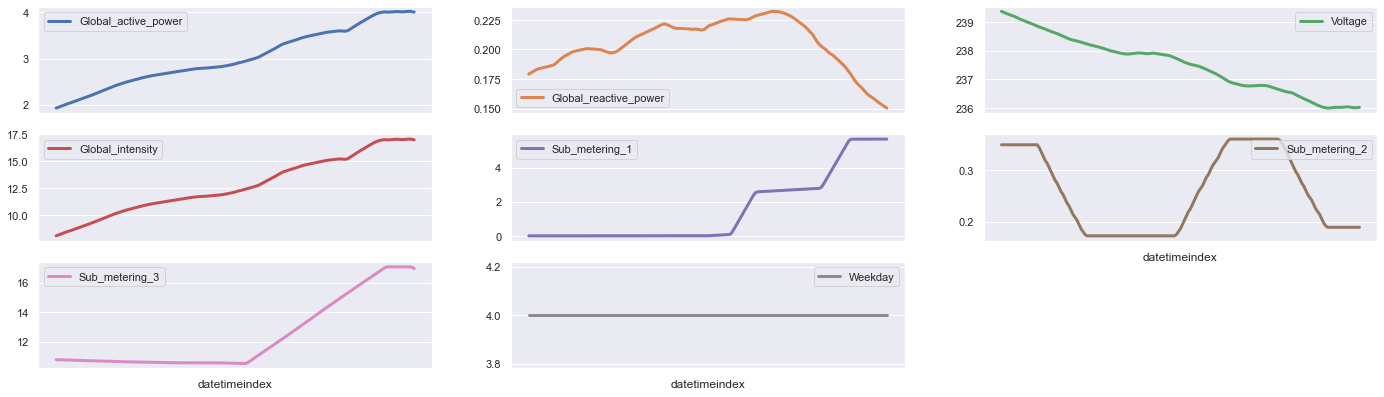

In [41]:
for ts in friday_dec_22_16to22.columns:
    
    decomposition = sm.tsa.seasonal_decompose(friday_dec_22_16to22[ts].dropna(),
                                             period=180)
    # Store back the results
    trend_dict[ts] = decomposition.trend

pd.DataFrame(trend_dict).plot(subplots=True, layout=(4, 3), linewidth=3);

In [42]:
df_friday_dec_22_16to22 = friday_dec_22.loc[(friday_dec_22['Seconds'] >= 57600) & (friday_dec_22['Seconds'] <= 79200)]

In [47]:
df_friday_dec_22 = friday_dec_22

In [44]:
df_friday_dec_22_16to22

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Seconds,Weekday
8556,2006-12-22,16:00:00,1.432,0.094,241.84,5.8,0.0,0.0,18.0,57600,4
8557,2006-12-22,16:01:00,1.434,0.096,242.29,5.8,0.0,0.0,18.0,57660,4
8558,2006-12-22,16:02:00,1.422,0.094,241.56,5.8,0.0,0.0,18.0,57720,4
8559,2006-12-22,16:03:00,1.428,0.096,242.04,5.8,0.0,0.0,18.0,57780,4
8560,2006-12-22,16:04:00,1.486,0.156,241.64,6.2,0.0,0.0,18.0,57840,4
...,...,...,...,...,...,...,...,...,...,...,...
8912,2006-12-22,21:56:00,5.010,0.070,234.70,21.2,0.0,0.0,16.0,78960,4
8913,2006-12-22,21:57:00,4.886,0.078,235.14,20.8,0.0,0.0,17.0,79020,4
8914,2006-12-22,21:58:00,4.082,0.072,236.22,17.8,0.0,0.0,18.0,79080,4
8915,2006-12-22,21:59:00,2.142,0.056,237.37,9.2,0.0,0.0,5.0,79140,4


In [55]:
df_friday_dec_22

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Seconds,Weekday
7596,2006-12-22,00:00:00,0.206,0.000,245.70,0.8,0.0,0.0,0.0,0,4
7597,2006-12-22,00:01:00,0.206,0.000,246.18,0.8,0.0,0.0,0.0,60,4
7598,2006-12-22,00:02:00,0.328,0.130,245.61,1.4,0.0,0.0,0.0,120,4
7599,2006-12-22,00:03:00,0.314,0.128,244.63,1.4,0.0,0.0,0.0,180,4
7600,2006-12-22,00:04:00,0.310,0.128,244.51,1.4,0.0,0.0,0.0,240,4
...,...,...,...,...,...,...,...,...,...,...,...
9031,2006-12-22,23:55:00,2.500,0.098,240.99,10.4,0.0,0.0,0.0,86100,4
9032,2006-12-22,23:56:00,2.488,0.100,241.43,10.2,0.0,0.0,0.0,86160,4
9033,2006-12-22,23:57:00,2.476,0.098,241.06,10.2,0.0,0.0,0.0,86220,4
9034,2006-12-22,23:58:00,1.310,0.098,241.66,7.0,0.0,0.0,0.0,86280,4


In [56]:
X = df_friday_dec_22.iloc[:,2:10]

In [57]:
X 

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Seconds
7596,0.206,0.000,245.70,0.8,0.0,0.0,0.0,0
7597,0.206,0.000,246.18,0.8,0.0,0.0,0.0,60
7598,0.328,0.130,245.61,1.4,0.0,0.0,0.0,120
7599,0.314,0.128,244.63,1.4,0.0,0.0,0.0,180
7600,0.310,0.128,244.51,1.4,0.0,0.0,0.0,240
...,...,...,...,...,...,...,...,...
9031,2.500,0.098,240.99,10.4,0.0,0.0,0.0,86100
9032,2.488,0.100,241.43,10.2,0.0,0.0,0.0,86160
9033,2.476,0.098,241.06,10.2,0.0,0.0,0.0,86220
9034,1.310,0.098,241.66,7.0,0.0,0.0,0.0,86280


In [58]:
scaler = MinMaxScaler()

In [60]:
data_scaled = scaler.fit_transform(X.iloc[:,0:6])

In [61]:
data_scaled

array([[5.20697735e-04, 0.00000000e+00, 8.30710798e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [5.20697735e-04, 0.00000000e+00, 8.56755290e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.64019787e-02, 2.09003215e-01, 8.25827455e-01, 1.79640719e-02,
        0.00000000e+00, 0.00000000e+00],
       ...,
       [2.96016662e-01, 1.57556270e-01, 5.78947368e-01, 2.81437126e-01,
        0.00000000e+00, 0.00000000e+00],
       [1.44233273e-01, 1.57556270e-01, 6.11502984e-01, 1.85628743e-01,
        0.00000000e+00, 0.00000000e+00],
       [1.53605832e-02, 1.51125402e-01, 6.84210526e-01, 1.79640719e-02,
        0.00000000e+00, 0.00000000e+00]])

In [ ]:
df_friday_dec_22_scaled = df_friday_dec_22

In [ ]:
df_friday_dec_22_scaled = df_friday_dec_22_scaled.assign(Global_active_power=data_scaled[:,0])
df_friday_dec_22_scaled = df_friday_dec_22_scaled.assign(Global_reactive_power=data_scaled[:,1])
df_friday_dec_22_scaled = df_friday_dec_22_scaled.assign(Global_intensity=data_scaled[:,2])
df_friday_dec_22_scaled = df_friday_dec_22_scaled.assign(Sub_metering_1=data_scaled[:,3])
df_friday_dec_22_scaled = df_friday_dec_22_scaled.assign(Sub_metering_2=data_scaled[:,4])
df_friday_dec_22_scaled = df_friday_dec_22_scaled.assign(Sub_metering_3=data_scaled[:,5])

In [ ]:
df_friday_dec_22_scaled

In [ ]:
df_friday_dec_22_scaled.describe()

In [ ]:
df_friday_dec_22.describe()

In [ ]:
X = df_friday_dec_22_scaled.drop(columns=['Global_intensity'])
y = df_friday_dec_22_scaled[['Global_intensity']]

In [ ]:
X

In [ ]:
y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.25,
                                                   random_state=42)

In [ ]:
X_test

In [ ]:
X_train

In [ ]:
exclude = ['Seconds']
X.loc[:, X.columns.difference(exclude)].plot()

In [ ]:
y.plot()

In [ ]:
regression_model = LinearRegression().fit(X_train, y_train)

In [ ]:
y_pred = regression_model.predict(X_test)

In [ ]:
y_pred

In [ ]:
y_test = y_test.to_numpy()

In [ ]:
results.shape

In [ ]:
y_test.shape

In [ ]:
metrics.mean_absolute_error(y_test, y_pred)

In [ ]:
metrics.mean_absolute_error(y_test, y_pred)

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [ ]:
plt.scatter(X_train['Seconds'], y_train)
plt.scatter(X_test['Seconds'], y_pred, color='red')
plt.show()

In [ ]:
np.argmax(y_pred)

In [ ]:
y_pred[236]

In [ ]:
X_test_to_numpy = X_test.to_numpy()

In [ ]:
X_test_to_numpy[[236]]

In [ ]:
X_test

In [ ]:
X_9_to_11 = X_test.loc[(X_test['Seconds'] >= 77280) & (X_test['Seconds'] <= 81200)]

In [ ]:
X_9_to_11

In [ ]:
twenty_after_spike = X_9_to_11.loc[(X_9_to_11['Seconds'] == 79320)]

In [ ]:
twenty_after_spike

In [ ]:
twenty_after_spike_pred = regression_model.predict(twenty_after_spike)

In [ ]:
twenty_after_spike_pred

In [ ]:
twenty_after_spike['Global_intensity'] = twenty_after_spike_pred

In [ ]:
twenty_after_spike

In [ ]:
twenty_after_spike = scaler.inverse_transform(twenty_after_spike)

In [ ]:
X_test['Global_intensity'] = y_pred

In [ ]:
X_test

In [ ]:
X_test = pd.DataFrame(X_test, 
                      columns=['Global_active_power',
                               'Global_reactive_power',
                               'Sub_metering_1',
                               'Sub_metering_2',
                               'Sub_metering_3',
                               'Seconds',
                               'Global_intensity'])

In [ ]:
X_test_seconds = X_test[['Seconds']]

In [ ]:
X_test_seconds

In [ ]:
X_test = X_test.drop(columns='Seconds')

In [ ]:
X_test

In [ ]:
X_test = scaler.inverse_transform(X_test)

In [ ]:
X_test_seconds = X_test_seconds.to_numpy()

In [ ]:
X_test_seconds.shape

In [ ]:
X_test = X_test.assign(Seconds=X_test_seconds)

In [ ]:
X_test = pd.DataFrame(X_test, 
                      columns=['Global_active_power',
                               'Global_reactive_power',
                               'Sub_metering_1',
                               'Sub_metering_2',
                               'Sub_metering_3',
                               'Global_intensity'])

In [ ]:
X_test['Seconds'] = X_test_seconds

In [ ]:
X_test

In [ ]:
X_test.loc[(X_test['Seconds']==79320)]

In [ ]:
plt.scatter(friday_dec_22['Seconds'], friday_dec_22['Global_intensity'])
plt.scatter(79320, 9.153735, color='red')
plt.show()

In [ ]:
X_test_local_min = X_test.to_numpy()

# y_pred

In [ ]:
y_pred_local_min

In [ ]:
X_test_local_min = X_test_local_min[:, [5]]

In [ ]:
X_test_local_min.shape

In [ ]:
X_test_local_minimas = X_test.loc[(X_test['Global_intensity']==X_test_local_min.reshape(-1))]

In [ ]:
X_test_local_minimas

In [ ]:
plt.scatter(friday_dec_22['Seconds'], friday_dec_22['Global_intensity'])
plt.scatter(X_test_local_minimas['Seconds'], X_test_local_minimas['Global_intensity'], color='red')
plt.show()